In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Milan Škriniar,sk SVK,DF,Paris S-G+Inter,fr Ligue 1+it Serie A,0.0,1995.0,112.0,103.0,9325,103.7,0.06,0.06,0.06,0.06,0.06,0.08,0.06,0.08,28.0,23.0,82.14,4.0,14.29,80.77,8.45,35.72,40.38,4.99,0.79,80.77,0.27,0.22,0.04,53.06,246.53,121.18,0.97,0.71,0.01,0.52,0.23,61.06,0.81,0.78,0.04,0.65,0.00,0.01,0.09,0.04,0.65,0.04,0.00,0.00,0.00,0.00,0.00,7001.0,7533.0,92.94,127807.0,38169.0,2585.0,2753.0,94.52,3689.0,3846.0,95.92,586.0,742.0,78.98,0.00,0.01,0.02,-0.01,0.24,3.91,0.24,0.03,3.71,72.64,69.96,2.61,1.75,0.04,0.51,0.13,0.71,0.00,0.00,0.00,0.00,67.51,0.07,0.27,0.00,0.15,0.00,11.35,0.00,-0.5,-0.5,47.20,0.10,0.01,0.01,1.22,0.71,0.03,0.77,0.92,0.00,0.01,5.27,1.21,1.34,1.43,0.83,0.49,0.10,0.76,1.25,0.49,0.99,0.64,2.20,2.66,0.07,61.21,4,0,0,3,1,0
1,1,Maxence Lacroix,fr FRA,DF,Wolfsburg,de Bundesliga,0.0,2000.0,111.0,103.0,9070,100.8,0.06,0.08,0.06,0.08,0.04,0.06,0.04,0.06,75.0,58.0,77.33,17.0,22.67,70.67,8.29,37.50,31.56,2.13,0.84,70.67,0.74,0.58,0.17,40.25,207.32,110.79,0.57,0.47,0.05,0.73,0.26,43.50,0.27,0.87,0.06,0.72,0.02,0.03,0.07,0.02,0.72,0.05,0.00,0.00,0.01,0.00,0.00,4893.0,5859.0,83.51,102529.0,36399.0,1344.0,1562.0,86.11,2923.0,3193.0,91.54,645.0,1011.0,63.80,0.01,0.02,0.03,-0.00,0.22,3.36,0.19,0.02,4.02,58.13,55.23,2.72,2.26,0.03,0.47,0.21,0.11,0.00,0.00,0.00,0.00,48.54,0.18,0.51,0.00,0.14,0.00,10.89,0.00,1.8,1.8,57.18,0.16,0.06,0.02,1.06,0.82,0.01,1.74,1.03,0.00,0.04,5.95,2.48,1.86,1.77,1.20,0.53,0.04,0.89,1.40,0.5

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
defense_players = final_player[final_player['Pos'].isin(['DF','DF,MF','MF,DF'])]
newbie = newbie[newbie['Pos'].isin(['DF','DF,MF','MF,DF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['DF','DF,MF','MF,DF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['DF','DF,MF','MF,DF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['DF','DF,MF','MF,DF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['DF','DF,MF','MF,DF'])]

# Reset the index if needed
defense_players = defense_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [6]:
Stones=defense_players[defense_players['Player']=='John Stones']
Stones

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
55,131,John Stones,eng ENG,"DF,MF",Manchester City,eng Premier League,0.0,1994.0,75.0,67.0,5962,66.2,0.12,0.15,0.12,0.15,0.07,0.1,0.07,0.1,36.0,25.0,69.44,7.0,19.44,83.91,5.65,27.43,47.68,9.2,0.97,83.91,0.55,0.38,0.11,57.61,339.52,188.13,1.66,1.8,0.03,0.32,0.2,66.77,1.03,1.06,0.12,0.91,0.02,0.02,0.08,0.05,0.91,0.09,0.0,0.0,0.03,0.0,0.0,4765.0,5140.0,92.7,81110.0,19169.0,1892.0,2006.0,95.04,2180.0,2299.0,94.82,319.0,413.0,77.24,0.0,0.03,0.03,0.0,0.3,5.42,0.18,0.0,4.87,77.64,75.54,2.05,0.75,0.02,0.56,0.23,1.18,0.02,0.0,0.0,0.0,71.98,0.05,0.47,0.0,0.23,0.0,8.5,0.0,3.3,3.3,73.46,0.06,0.02,0.0,0.36,0.42,0.03,0.73,0.41,0.0,0.0,4.44,2.0,0.75,0.77,0.42,0.23,0.12,0.27,0.45,0.18,0.82,0.53,1.49,2.17,0.03,55.05,4,4,0,0,0,0


In [7]:
Stones_2023=player_2023[player_2023['Player']=='John Stones']
Stones_2023

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
552,2538,John Stones,eng ENG,"DF,MF",Manchester City,eng Premier League,28,1994,23,21,1846,20.5,0.1,0.2,0.1,0.2,0.05,0.12,0.05,0.12,10.0,6.0,60.0,1.0,10.0,82.44,4.93,26.54,45.95,10.24,1.32,82.44,0.49,0.29,0.05,52.68,302.49,158.54,1.37,1.56,0.05,0.39,0.2,64.0,1.66,0.78,0.24,0.59,0.05,0.0,0.15,0.0,0.0,0.2,0.0,0.0,0.05,0.0,0.0,1453.0,1563.0,93.0,24351.0,6789.0,708.0,740.0,95.7,625.0,666.0,93.8,99.0,124.0,79.8,0.0,0.07,0.05,0.03,0.39,5.32,0.15,0.0,4.93,76.24,72.98,3.22,0.83,0.05,0.68,0.29,2.2,0.05,0.0,0.0,0.0,70.88,0.05,0.49,0.54,0.15,0.18,0.67,0.1,1.0,1.0,67.3,0.1,0.0,0.0,0.49,0.39,0.05,0.44,0.63,0.0,0.0,4.39,1.61,0.78,1.12,0.54,0.39,0.2,0.34,0.49,0.15,0.83,0.49,1.56,1.95,0.0,70.0


In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defense_players[params].rank(pct=True) * 100

# Get the row of Stones' stats from the percentile ranks DataFrame
stones_percentile_ranks = round(players_percentile_ranks.iloc[[55]],0)

# Print the percentile ranks for Stones
stones_percentile_ranks


,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
55,90.0,74.0,91.0,74.0,73.0,52.0,74.0,53.0,52.0,60.0,83.0,37.0,11.0,94.0,54.0,61.0,97.0,52.0,47.0,94.0,39.0,47.0,29.0,96.0,98.0,98.0,65.0,86.0,27.0,10.0,29.0,98.0,47.0,41.0,48.0,45.0,35.0,46.0,61.0,62.0,65.0,50.0,38.0,41.0,86.0,36.0,45.0,84.0,77.0,99.0,82.0,63.0,80.0,78.0,98.0,83.0,80.0,96.0,71.0,60.0,97.0,20.0,37.0,32.0,55.0,38.0,94.0,26.0,9.0,84.0,95.0,96.0,18.0,25.0,38.0,82.0,34.0,42.0,74.0,39.0,40.0,48.0,97.0,9.0,32.0,19.0,69.0,29.0,82.0,19.0,96.0,96.0,98.0,5.0,80.0,39.0,1.0,19.0,35.0,16.0,1.0,39.0,19.0,24.0,71.0,13.0


In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
stones_percentile_ranks_sorted = stones_percentile_ranks.T.sort_values(by=55, ascending=False)

# Get the top 20 parameters
top_20_params = stones_percentile_ranks_sorted.index[:30]
top_20_params_values = stones_percentile_ranks_sorted[55].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Passes_Total_Cmp%', 'Passes_Received_per_90',
       'Progressive_Distance_Carried_per_90', 'Percentage_of_Aerials_Won',
       'Total_Distance_per_90', 'Passes_Short_Cmp%', 'Passes_Cmp_per_90',
       'Passes_Long_Cmp%', 'Touches_Mid_3rd_per_90', 'Passes_Medium_Cmp%',
       'Live_Ball_Passes_per_90', 'Npxg_net', 'Carries_per_90', 'Xg_net',
       'Passes_Attempted_per_90', 'Tocuhes_Live_Balls_per_90',
       'Touches_per_90', 'Passes_1/3_per_90', 'G-PK_per90', 'Goals_per90',
       '1/3_Carries_per_90', 'Shot_Goal_per_90', 'Passes_Total_Cmp',
       'Progressive_Passes_per_90', 'Take_Ons_Succ%', 'Passes_Medium_Cmp',
       'Passes_TotDist', 'Switches_per_90', 'Goals_per_shot_on_target',
       'Passes_Short_Cmp'],
      dtype='object')
Values:
Passes_Total_Cmp%                      99.0
Passes_Received_per_90                 98.0
Progressive_Distance_Carried_per_90    98.0
Percentage_of_Aerials_Won              98.0
Total_Distance_per_90                  98

In [10]:
import pandas as pd







params = [
    "Passes_Total_Cmp%",
    "Passes_Received_per_90",
    "Progressive_Distance_Carried_per_90",
    "Percentage_of_Aerials_Won",
    "Total_Distance_per_90",
    "Passes_Short_Cmp%",
    "Passes_Cmp_per_90",
    "Passes_Long_Cmp%",
    "Touches_Mid_3rd_per_90",
    "Carries_per_90",
    "Progressive_Passes_per_90",
    "Passes_1/3_per_90",
    "Live_Ball_Passes_per_90",
    "Touches_per_90",
    "Switches_per_90"
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
stones_2023_percentile_ranks = round(players_percentile_ranks.iloc[[552]],0)

# Print the percentile ranks for Declan Rice
stones_2023_percentile_ranks


,Passes_Total_Cmp%,Passes_Received_per_90,Progressive_Distance_Carried_per_90,Percentage_of_Aerials_Won,Total_Distance_per_90,Passes_Short_Cmp%,Passes_Cmp_per_90,Passes_Long_Cmp%,Touches_Mid_3rd_per_90,Carries_per_90,Progressive_Passes_per_90,Passes_1/3_per_90,Live_Ball_Passes_per_90,Touches_per_90,Switches_per_90
552,99.0,97.0,92.0,88.0,94.0,99.0,96.0,98.0,96.0,91.0,86.0,94.0,96.0,93.0,86.0


In [11]:

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defense_players[params].rank(pct=True) * 100

# Get the row of Stones' stats from the percentile ranks DataFrame
stones_percentile_ranks = round(players_percentile_ranks.iloc[[55]],0)

# Print the percentile ranks for Stones
stones_percentile_ranks


,Passes_Total_Cmp%,Passes_Received_per_90,Progressive_Distance_Carried_per_90,Percentage_of_Aerials_Won,Total_Distance_per_90,Passes_Short_Cmp%,Passes_Cmp_per_90,Passes_Long_Cmp%,Touches_Mid_3rd_per_90,Carries_per_90,Progressive_Passes_per_90,Passes_1/3_per_90,Live_Ball_Passes_per_90,Touches_per_90,Switches_per_90
55,99.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,97.0,96.0,84.0,94.0,96.0,94.0,82.0


In [12]:
len(params)

15

In [13]:
stones_percentile_ranks_list = stones_percentile_ranks.values.flatten().tolist()

stones_percentile_ranks_list

[99.0,
 98.0,
 98.0,
 98.0,
 98.0,
 98.0,
 97.0,
 97.0,
 97.0,
 96.0,
 84.0,
 94.0,
 96.0,
 94.0,
 82.0]

In [14]:
stones_2023_percentile_ranks_list = stones_2023_percentile_ranks.values.flatten().tolist()

stones_2023_percentile_ranks_list

[99.0,
 97.0,
 92.0,
 88.0,
 94.0,
 99.0,
 96.0,
 98.0,
 96.0,
 91.0,
 86.0,
 94.0,
 96.0,
 93.0,
 86.0]

In [15]:
params = [
    "Passes_Total_Completed_%",
    "Passes_Received_per_90",
    "Progressive_Distance_Carried_per_90",
    "Percentage_of_Aerials_Won",
    "Total_Distance_per_90",
    "Passes_Short_Completed_%",
    "Passes_Completd_per_90",
    "Passes_Long_Completed_%",
    "Touches_Middle_3rd_per_90",
    "Carries_per_90",
    "Progressive_Passes_per_90",
    "Passes_to_Final_Third_per_90",
    "Live_Ball_Passes_per_90",
    "Touches_per_90",
    "Switches_per_90"
]


split_params = [param.replace('_', '\n') for param in params]

In [16]:
params = [
    "Passes_Total_Cmp%",
    "Passes_Received_per_90",
    "Progressive_Distance_Carried_per_90",
    "Percentage_of_Aerials_Won",
    "Total_Distance_per_90",
    "Passes_Short_Cmp%",
    "Passes_Cmp_per_90",
    "Passes_Long_Cmp%",
    "Touches_Mid_3rd_per_90",
    "Carries_per_90",
    "Progressive_Passes_per_90",
    "Passes_1/3_per_90",
    "Live_Ball_Passes_per_90",
    "Touches_per_90",
    "Switches_per_90"
]



In [17]:
image_path = "Stones.jpg"
fdj_cropped = Image.open(image_path)


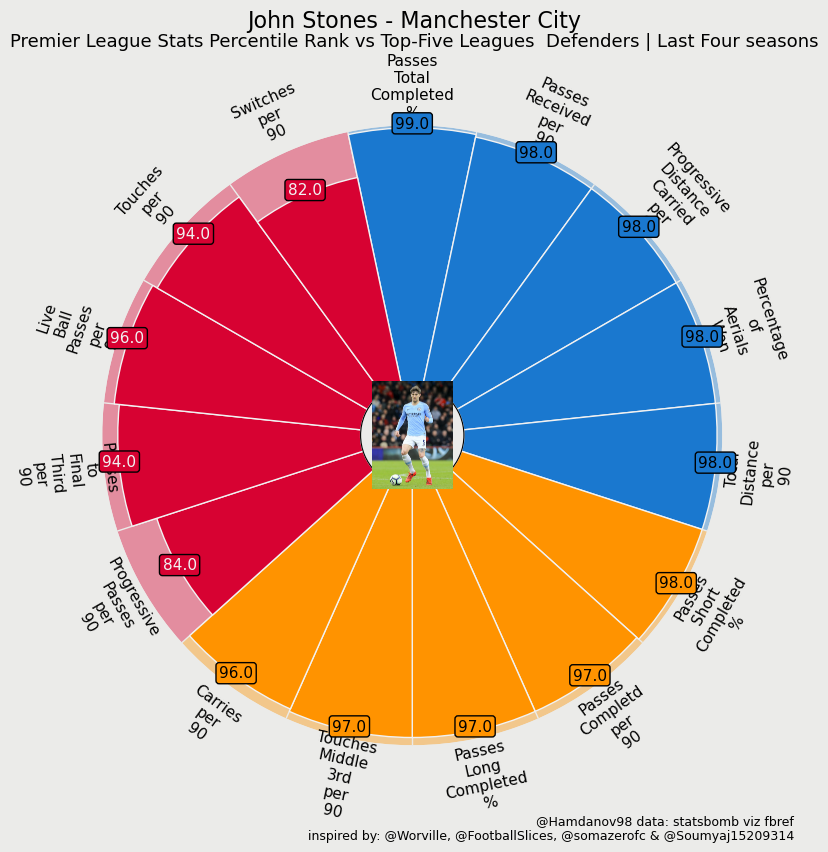

In [18]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    stones_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "John Stones - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues  Defenders | Last Four seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Stones_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


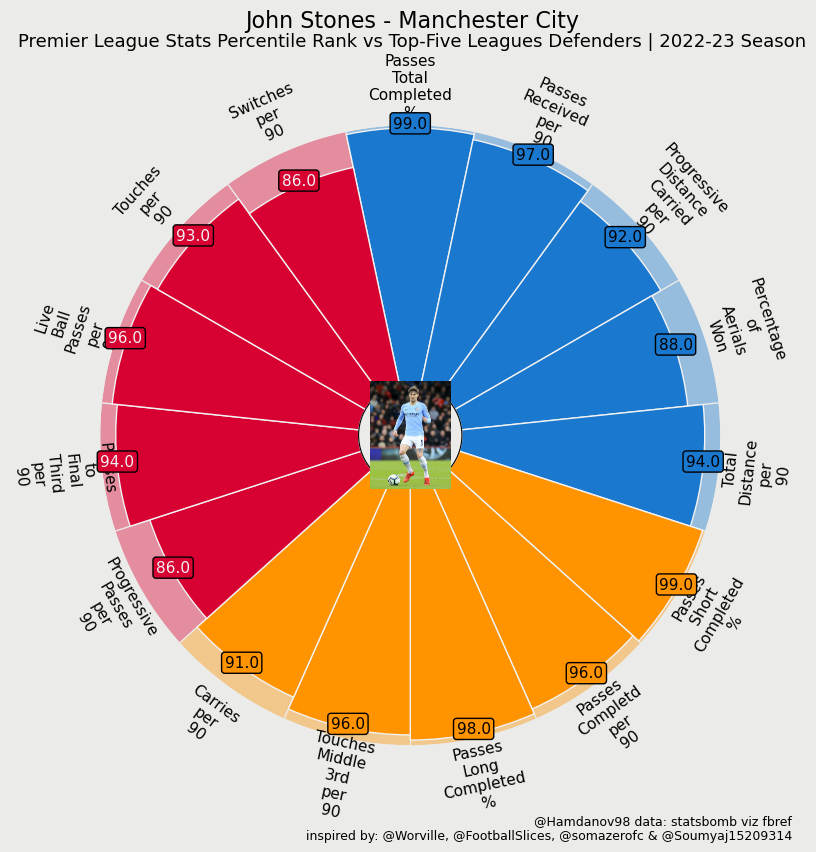

In [19]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    stones_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "John Stones - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Defenders | 2022-23 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Stones_2023_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [20]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90', 'Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in defense_players.columns:
        defense_players[feature] = -defense_players[feature]
        player_2024[feature]=-player_2024[feature]

In [21]:
# Normalize data
numerical_defense_players = defense_players[params].replace([np.inf, -np.inf], 0)
normalized_defense_players = (numerical_defense_players - numerical_defense_players.mean()) / numerical_defense_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_defense_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [22]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_defense_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=defense_players.index)

In [23]:
# Get de Stones's row and compute cosine similarity
stones_index = defense_players.index[defense_players['Player'] == 'John Stones'][0]
stones_data = transformed_df.loc[stones_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=stones_index)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, stones_data).flatten()
transformed_df['similarity_to_stones'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_stones', ascending=False).index
top_similar_players = defense_players.loc[top_similar_players_indices]

In [25]:
# Visualize the results
defense_players['similarity_to_stones'] = transformed_df['similarity_to_stones']
defense_players_sorted = defense_players.sort_values(by='similarity_to_stones', ascending=False)
defense_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_stones
56,132,Axel Disasi,fr FRA,DF,Chelsea+Monaco,eng Premier League+fr Ligue 1,0.0,1998.0,130.0,120.0,10641,118.2,0.07,0.10,0.07,0.10,0.09,0.11,0.08,0.11,72.0,50.0,69.44,17.0,23.61,72.26,7.39,31.00,37.95,3.83,1.09,72.25,0.61,0.42,0.14,47.89,262.49,158.21,1.18,0.71,0.08,-0.41,-0.31,50.74,0.39,0.51,0.05,0.44,0.01,0.00,0.04,0.00,0.44,0.04,0.00,0.00,0.01,0.00,0.00,6539.0,7544.0,86.68,124249.0,48626.0,2267.0,2466.0,92.58,3584.0,3895.0,92.02,604.0,1011.0,59.74,0.00,0.02,0.04,0.00,0.19,4.51,0.27,0.04,4.44,63.83,61.41,2.25,1.34,0.06,0.56,0.25,0.86,0.00,0.00,0.00,0.0,55.32,0.16,0.45,0.00,0.18,0.00,12.19,0.00,-1.7,-0.9,66.05,-0.15,-0.02,-0.00,-1.01,0.51,0.06,1.07,0.73,0.00,-0.02,5.96,2.45,-1.24,1.13,0.59,0.48,0.07,0.67,1.11,0.44,1.14,0.77,2.20,3.00,0.04,59.53,4,1,0,0,3,0,0.986950
205,455,Mats Hummels,de GER,DF,Dortmund,de Bundesliga,0.0,1988.0,111.0,96.0,8177,90.9,0.11,0.13,0.11,0.13,0.12,0.16,0.12,0.16,35.0,21.0,60.00,13.0,37.14,91.36,8.65,40.67,47.90,3.35,1.22,91.36,0.39,0.23,0.14,57.17,296.95,170.56,0.74,0.66,0.02,-0.35,-0.20,63.27,0.20,1.23,0.12,1.05,0.02,0.00,0.12,0.02,1.05,0.09,0.00,0.00,0.02,0.00,0.01,6383.0,7279.0,87.69,135168.0,38238.0,1536.0,1675.0,91.28,3690.0,3965.0,93.06,946.0,1278.0,74.02,0.00,0.04,0.05,-0.02,0.40,4.21,0.34,0.03,4.65,80.08,77.43,2.49,2.21,0.11,0.84,0.12,0.22,0.00,0.00,0.00,0.0,70.22,0.15,0.52,0.00,0.31,0.00,8.74,0.00,-0.9,-0.9,66.60,-0.20,-0.01,-0.00,-0.80,0.61,0.11,1.88,1.43,0.00,-0.

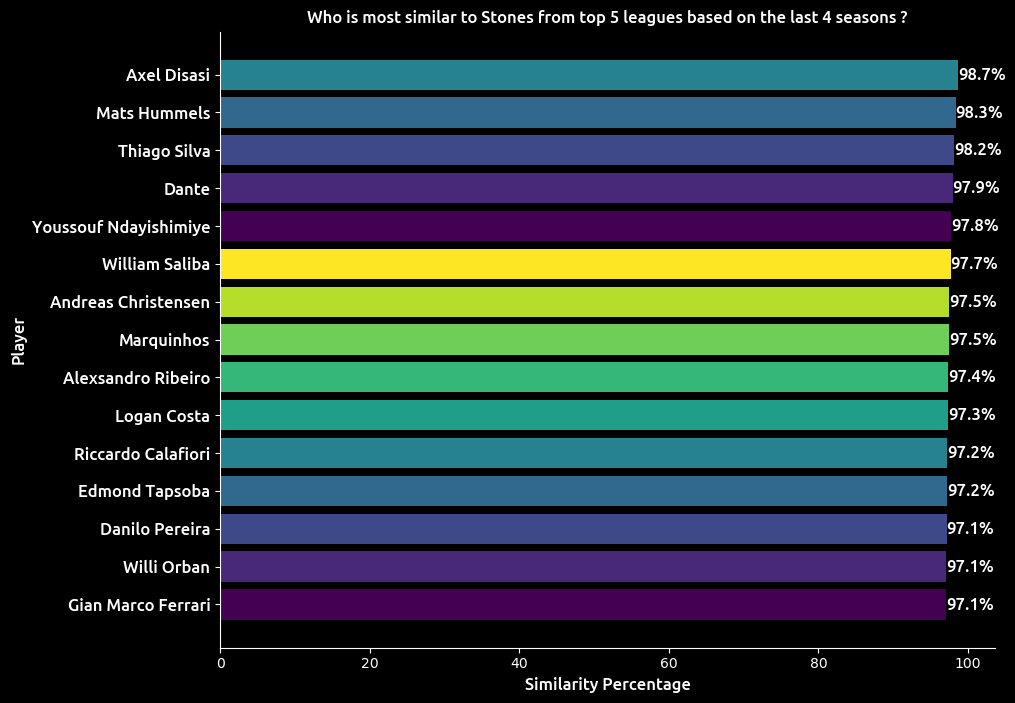

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the defense_players DataFrame by similarity_to_stones in descending order
defense_players_sorted = defense_players.sort_values(by='similarity_to_stones', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(defense_players_sorted['Player'].head(15)[::-1], (defense_players_sorted['similarity_to_stones'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Stones from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(defense_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()

In [27]:
Ndayishimiye=defense_players[defense_players['Player']=='Youssouf Ndayishimiye']
Ndayishimiye

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_stones
567,1566,Youssouf Ndayishimiye,bi BDI,"MF,DF",Nice,fr Ligue 1,0.0,1998.0,23.0,20.0,1712,19.0,0.0,0.0,0.0,0.0,0.06,0.09,0.06,0.09,15.0,11.0,73.3,3.0,20.0,79.79,4.58,22.89,51.63,5.79,0.95,79.79,0.79,0.58,0.16,62.0,311.21,134.0,0.84,0.89,0.05,-0.74,-0.74,59.42,0.68,1.52,0.05,1.42,0.05,0.0,0.05,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1223.0,1361.0,89.9,19183.0,5129.0,630.0,674.0,93.5,488.0,532.0,91.7,60.0,92.0,65.2,0.0,0.03,0.03,-0.03,0.58,4.47,0.32,0.0,5.05,71.63,69.11,2.42,2.16,0.16,0.37,0.05,0.26,0.0,0.0,0.0,0.0,64.37,0.11,0.47,0.74,0.16,0.0,0.0,0.08,-1.2,-1.2,61.4,-0.32,-0.05,-0.0,-0.79,0.63,0.0,0.63,1.05,0.0,-0.0,5.0,1.84,-1.16,1.63,0.89,0.63,0.11,0.63,1.21,0.58,1.0,0.58,2.26,2.47,0.05,52.2,1,0,0,0,1,0,0.977542


In [28]:
# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = defense_players[params].rank(pct=True) * 100

# Get the row of Ndayishimiye's stats from the percentile ranks DataFrame
Ndayishimiye_percentile_ranks = round(players_percentile_ranks.iloc[[567]], 0)

# Print the percentile ranks for schlotterbeck
Ndayishimiye_percentile_ranks


,Passes_Total_Cmp%,Passes_Received_per_90,Progressive_Distance_Carried_per_90,Percentage_of_Aerials_Won,Total_Distance_per_90,Passes_Short_Cmp%,Passes_Cmp_per_90,Passes_Long_Cmp%,Touches_Mid_3rd_per_90,Carries_per_90,Progressive_Passes_per_90,Passes_1/3_per_90,Live_Ball_Passes_per_90,Touches_per_90,Switches_per_90
567,93.0,94.0,82.0,74.0,96.0,91.0,93.0,82.0,99.0,98.0,87.0,87.0,93.0,90.0,63.0


In [29]:
Ndayishimiye_percentile_ranks_list = Ndayishimiye_percentile_ranks.values.flatten().tolist()

Ndayishimiye_percentile_ranks_list

[93.0,
 94.0,
 82.0,
 74.0,
 96.0,
 91.0,
 93.0,
 82.0,
 99.0,
 98.0,
 87.0,
 87.0,
 93.0,
 90.0,
 63.0]

In [30]:
image_path = "Ndayishimiye.jpg"
fdj_cropped = Image.open(image_path)


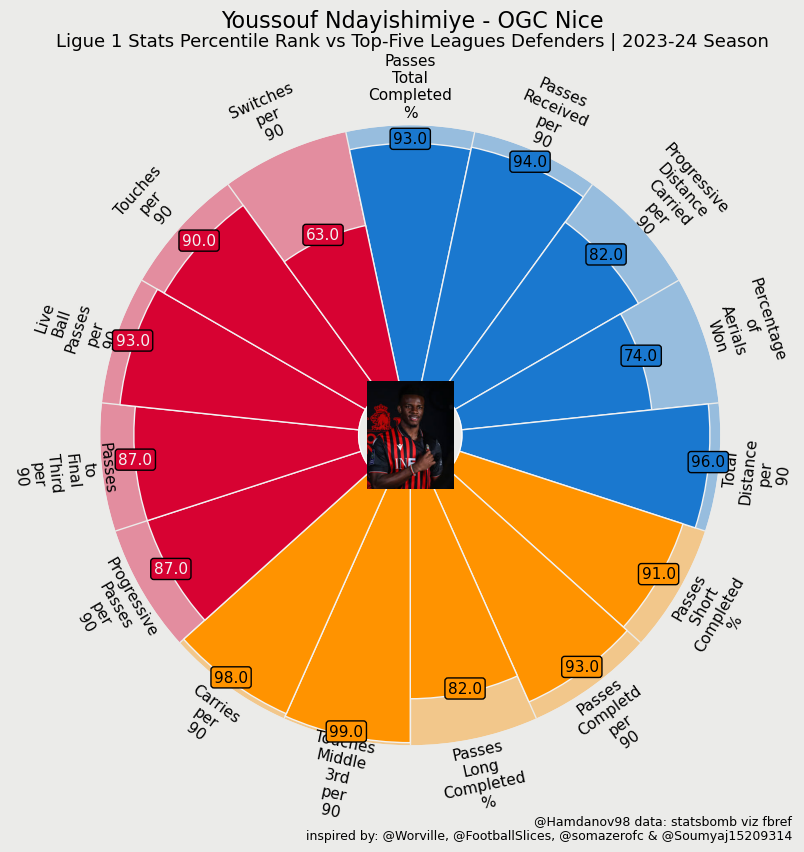

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Ndayishimiye_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Youssouf Ndayishimiye - OGC Nice", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Defenders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Ndayishimiye_2024_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png


In [32]:
player_2024 = player_2024[player_2024['Player'] != 'John Stones']
player_2024


,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,-0.95,-0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.0,0.0,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,-0.07,-0.00,-0.00,-0.88,1.90,0.15,0.58,1.39,0.0,-0.07,5.47,0.36,-0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.48,31.59,36.21,3.69,1.13,70.68,0.49,0.26,0.23,48.74,280.36,159.26,1.17,0.61,0.00,-0.74,-0.13,45.40,0.29,0.78,0.03,0.61,0.03,0.00,0.10,0.03,0.00,0.00,0.00,0.00,0.03,0.0,0.0,1552.0,1836.0,84.5,29618.0,9672.0,487.0,548.0,88.9,893.0,976.0,91.5,141.0,252.0,56.0,0.00,0.01,0.02,-0.01,0.26,4.17,0.10,0.00,4.43,59.42,53.40,5.76,2.43,0.06,0.42,0.10,0.94,0.00,0.00,0.00,0.00,50.23,0.26,0.65,0.68,0.23,0.14,0.43,0.13,0.6,0.4,62.2,-0.16,-0.00,-0.00,-0.84,0.39,0.00,1.26,1.13,0.0,-0.00,4.82,1.97,-1.20,2.07,1.17,0.74,0.16,0.84,1.46,0.61,1.65,1.04,3.33,3.53,0.06,57.8
2,9,Abner,br BRA,DF,Betis,es La Liga,0.0,2000.0,23,15,1400,15.6,0.00,0.06,0.00,0.06,0.01,0.07,0.01,0.07,13.0,7.0,53.8,5.0,38.5,61.92,4.62,22.05,25

In [33]:
player_2024=pd.concat([player_2024,Stones_2023])
player_2024=player_2024.reset_index(drop=True)
player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,-0.95,-0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.0,0.0,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,-0.07,-0.00,-0.00,-0.88,1.90,0.15,0.58,1.39,0.0,-0.07,5.47,0.36,-0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.48,31.59,36.21,3.69,1.13,70.68,0.49,0.26,0.23,48.74,280.36,159.26,1.17,0.61,0.00,-0.74,-0.13,45.40,0.29,0.78,0.03,0.61,0.03,0.00,0.10,0.03,0.00,0.00,0.00,0.00,0.03,0.0,0.0,1552.0,1836.0,84.5,29618.0,9672.0,487.0,548.0,88.9,893.0,976.0,91.5,141.0,252.0,56.0,0.00,0.01,0.02,-0.01,0.26,4.17,0.10,0.00,4.43,59.42,53.40,5.76,2.43,0.06,0.42,0.10,0.94,0.00,0.00,0.00,0.00,50.23,0.26,0.65,0.68,0.23,0.14,0.43,0.13,0.6,0.4,62.2,-0.16,-0.00,-0.00,-0.84,0.39,0.00,1.26,1.13,0.0,-0.00,4.82,1.97,-1.20,2.07,1.17,0.74,0.16,0.84,1.46,0.61,1.65,1.04,3.33,3.53,0.06,57.8
2,9,Abner,br BRA,DF,Betis,es La Liga,0.0,2000.0,23,15,1400,15.6,0.00,0.06,0.00,0.06,0.01,0.07,0.01,0.07,13.0,7.0,53.8,5.0,38.5,61.92,4.62,22.05,25

In [34]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        player_2024[feature]=-player_2024[feature]
        player_2022[feature]=-player_2022[feature]

In [35]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [36]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [37]:
# Get stones's row and compute cosine similarity
stones_2023_index = player_2024.index[player_2024['Player'] == 'John Stones'][0]
stones_2023_data = transformed_df.loc[stones_2023_index].values.reshape(1, -1)

# Remove stones from the dataset for comparison
transformed_df = transformed_df.drop(index=stones_2023_index)

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, stones_2023_data).flatten()
transformed_df['similarity_to_stones_2023'] = similarity_scores

# Get top 10 players most similar to de stones
top_similar_players_indices = transformed_df.sort_values('similarity_to_stones_2023', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [39]:
player_2024['similarity_to_stones_2023']=transformed_df['similarity_to_stones_2023']
player_2024[['Player', 'similarity_to_stones_2023']]


,Player,similarity_to_stones_2023
0,Max Aarons,-0.822007
1,Yunis Abdelhamid,0.774821
2,Abner,-0.815532
3,Abdel Abqar,-0.845623
4,Francesco Acerbi,0.841569
...,...,...
662,Alex Sola,-0.948888
663,Kevin Vogt,0.723412
664,Mateusz Wieteska,-0.746913
665,Nadir Zortea,-0.914655


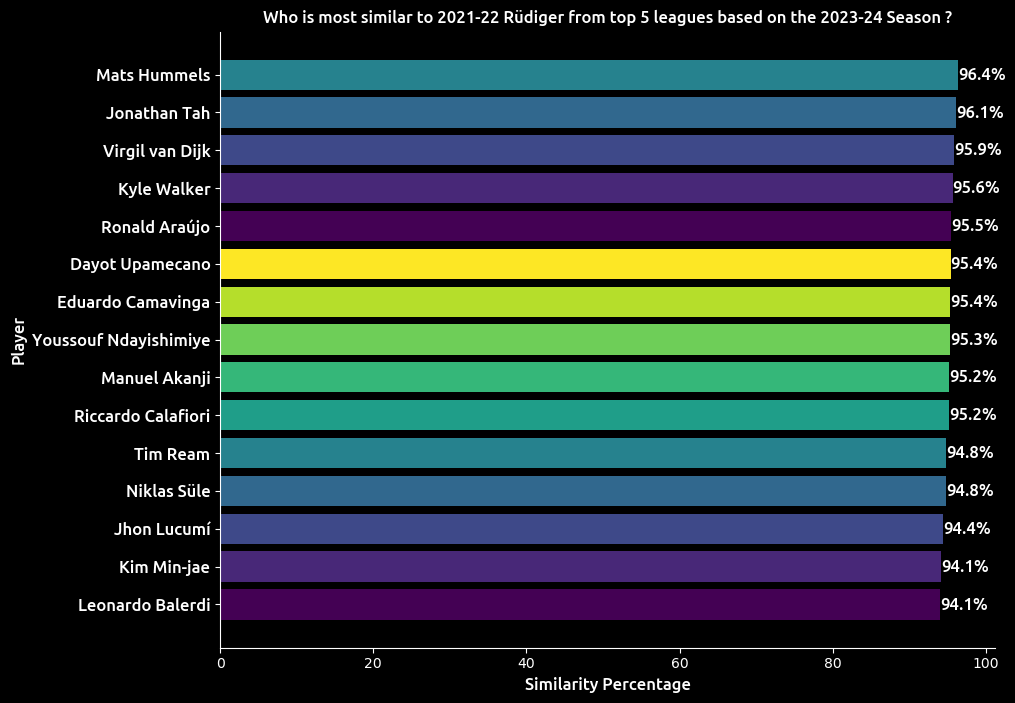

In [40]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_stones_2023 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_stones_2023', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_stones_2023'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to 2021-22 Rüdiger from top 5 leagues based on the 2023-24 Season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2023.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [41]:
Tah=player_2024[player_2024['Player']=='Jonathan Tah']
Tah

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_stones_2023
553,2545,Jonathan Tah,de GER,DF,Leverkusen,de Bundesliga,0.0,1996.0,31,30,2631,29.2,0.14,0.17,0.14,0.17,0.07,0.08,0.07,0.08,9.0,5.0,55.6,4.0,44.4,83.36,7.09,27.05,51.95,4.79,1.16,83.36,0.31,0.17,0.14,53.32,276.44,156.44,0.58,0.89,0.03,0.38,0.17,62.05,0.14,0.65,0.14,0.51,0.0,0.0,0.1,0.0,0.03,0.1,0.0,0.0,0.03,0.0,0.0,2070.0,2193.0,94.4,32998.0,13638.0,1045.0,1077.0,97.0,908.0,962.0,94.4,89.0,110.0,80.9,0.03,0.01,0.03,0.02,0.17,5.62,0.03,0.0,4.55,75.1,73.84,1.13,0.89,0.03,0.24,0.1,0.03,0.0,0.0,0.0,0.0,70.89,0.14,0.21,0.89,0.34,0.15,0.4,0.08,1.9,1.9,73.8,0.21,0.0,0.0,1.13,0.14,0.03,0.79,0.31,0.0,0.0,5.51,2.12,0.75,0.65,0.34,0.24,0.07,0.17,0.55,0.38,0.96,0.79,1.44,3.32,0.03,31.3,0.960532


In [42]:
# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of schlotterbeck's stats from the percentile ranks DataFrame
Tah_percentile_ranks = round(players_percentile_ranks.iloc[[553]], 0)

# Print the percentile ranks for schlotterbeck
Tah_percentile_ranks

,Passes_Total_Cmp%,Passes_Received_per_90,Progressive_Distance_Carried_per_90,Percentage_of_Aerials_Won,Total_Distance_per_90,Passes_Short_Cmp%,Passes_Cmp_per_90,Passes_Long_Cmp%,Touches_Mid_3rd_per_90,Carries_per_90,Progressive_Passes_per_90,Passes_1/3_per_90,Live_Ball_Passes_per_90,Touches_per_90,Switches_per_90
553,100.0,92.0,90.0,98.0,88.0,99.0,94.0,99.0,98.0,91.0,76.0,92.0,93.0,90.0,53.0


In [43]:
Tah_percentile_ranks_list = Tah_percentile_ranks.values.flatten().tolist()

Tah_percentile_ranks_list

[100.0,
 92.0,
 90.0,
 98.0,
 88.0,
 99.0,
 94.0,
 99.0,
 98.0,
 91.0,
 76.0,
 92.0,
 93.0,
 90.0,
 53.0]

In [44]:
image_path = "Tah.jpg"
fdj_cropped = Image.open(image_path)


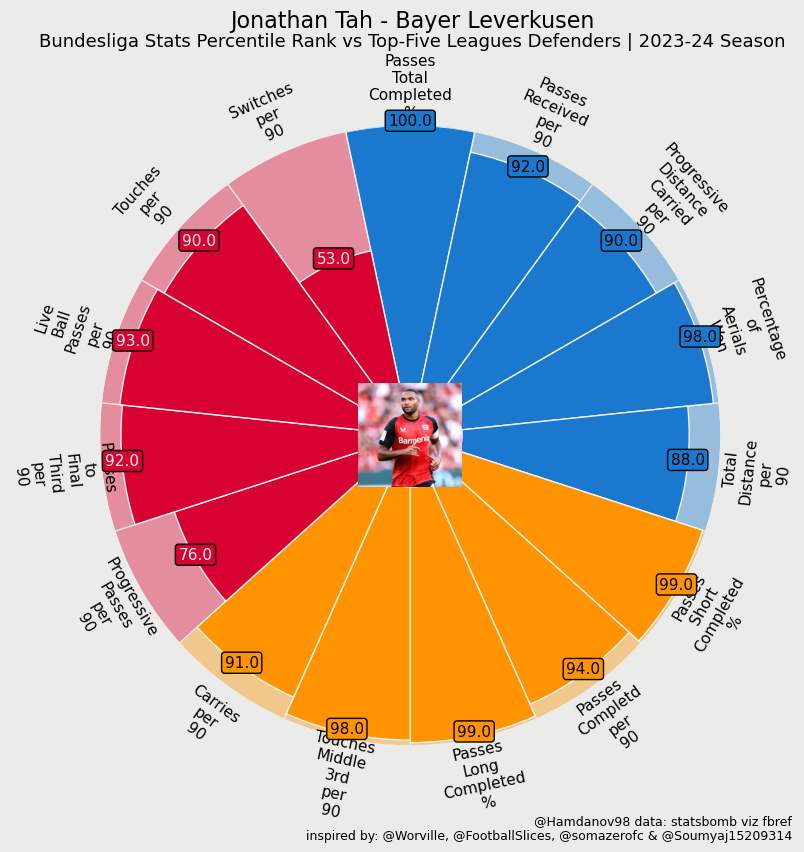

In [45]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Tah_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Jonathan Tah - Bayer Leverkusen", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Defenders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Tah_2024_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png
